In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv("car_data_dataset.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
df["Fuel_Type"].value_counts().to_dict()

{'Petrol': 239, 'Diesel': 60, 'CNG': 2}

In [4]:
df["Fuel_Type"].replace({'Petrol': 2, 'Diesel': 1, 'CNG': 3},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,2,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,2,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [5]:
df["Seller_Type"].value_counts().to_dict()

{'Dealer': 195, 'Individual': 106}

In [6]:
df["Seller_Type"].replace({'Dealer': 0, 'Individual': 1},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,2,0,Manual,0
298,city,2009,3.35,11.00,87934,2,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [7]:
df["Transmission"].value_counts().to_dict()

{'Manual': 261, 'Automatic': 40}

In [8]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
df["Transmission"].replace({'Manual':1, 'Automatic':0},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [10]:
df["Transmission"].value_counts().to_dict()

{1: 261, 0: 40}

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [12]:
df.drop("Car_Name",axis=1,inplace=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [13]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.066046,-0.039896,0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.541973,-0.550724,-0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.462434,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.165307,-0.101419,-0.162510,0.089216
Fuel_Type,-0.066046,-0.541973,-0.462434,-0.165307,1.000000,0.328810,0.102234,0.049163
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.328810,1.000000,0.063240,0.124269
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.102234,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,0.049163,0.124269,-0.050316,1.000000


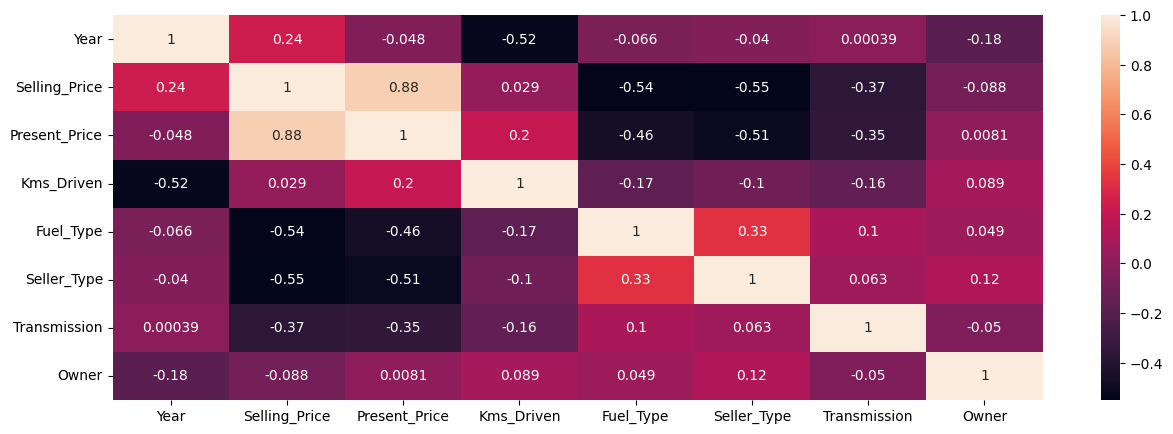

In [26]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Correlation.png')

In [15]:
x = df.drop('Selling_Price',axis = 1)
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot: >

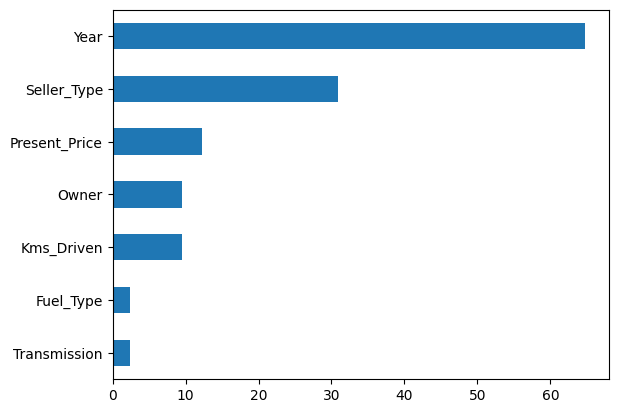

In [16]:
vif_list = []
for i in range(df.shape[1] -1):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [17]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22)
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
158,2017,0.540,8600,2,1,1,0
46,2013,4.890,64532,2,0,1,0
131,2015,0.820,18000,2,1,1,0
172,2014,0.640,13700,2,1,1,0
71,2011,12.480,45000,1,0,1,0
...,...,...,...,...,...,...,...
252,2015,6.820,31427,2,0,0,0
14,2009,7.210,77427,2,0,1,0
146,2014,0.787,15000,2,1,1,0
84,2005,13.460,197176,1,0,1,0


In [19]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
111,2016,1.500,8700,2,1,1,0
56,2015,7.270,40534,2,0,1,0
300,2016,5.900,5464,2,0,1,0
254,2013,9.900,54242,2,0,1,0
41,2014,3.980,46706,2,0,1,0
...,...,...,...,...,...,...,...
99,2010,20.450,50024,1,0,1,0
150,2011,0.826,6000,2,1,1,0
112,2014,2.400,7000,2,1,1,0
123,2013,1.470,46500,2,1,1,0


In [20]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [21]:
linear_reg.score(x_train, y_train)

0.9013080757336993

In [22]:
y_pred = linear_reg.predict(x_test)

In [23]:
y_pred[:10]

array([1.69287718, 4.79985388, 4.73623987, 5.18929367, 2.95092982,
       4.33446805, 7.61043651, 5.48359939, 7.96427553, 1.14755954])

In [24]:
y_test[:10]

C:\Users\Suraj\AppData\Local\Temp\ipykernel_5456\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


111    1.15
56     4.50
300    5.30
254    5.25
41     2.55
280    5.25
90     3.80
243    6.25
267    8.35
151    0.50
Name: Selling_Price, dtype: float64

In [25]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_test, y_pred)
print("R Squared Value is :",r_squared)

Mean Squared Error : 4.8004051547126005
Root Mean Squared Error : 2.190982691559338
Mean Absolute Error : 1.3121372941017504
R Squared Value is : 0.6463719583318122


In [26]:
r_squared = linear_reg.score(x_train, y_train) # r2 value
print("R Squared Value is :",r_squared)

R Squared Value is : 0.9013080757336993


In [27]:
y_pred_train=linear_reg.predict(x_train)

In [28]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 2.8463266068563358
Root Mean Squared Error : 1.687105985661937
Mean Absolute Error : 1.1609383995105378
R Squared Value is : 0.9013080757336993


In [29]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_model.score(x_train, y_train)

0.8623597543994097

In [30]:
lasso_model.score(x_test, y_test)

0.6511877269161759

In [31]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 2.8477281755686943
Root Mean Squared Error : 1.6875213111450458
Mean Absolute Error : 1.1577246883748573
R Squared Value is : 0.9012594785302438


In [32]:
lasso_reg_model = Lasso()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_lasso_model = GridSearchCV(lasso_reg_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [33]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 2.8521485785394356
Root Mean Squared Error : 1.6888305357671134
Mean Absolute Error : 1.1589405778655275
R Squared Value is : 0.9011062079694571


In [34]:
ridge_reg_model = Ridge()

hyperparameters = {"alpha" : np.arange(0.01, 5, 0.01)}
gscv_ridge_model = GridSearchCV(ridge_reg_model, hyperparameters, cv = 5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.01)

In [35]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(x_train, y_train)

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R Squared Value is :",r_squared)

Mean Squared Error : 2.8463267610904244
Root Mean Squared Error : 1.6871060313715982
Mean Absolute Error : 1.1609051783805457
R Squared Value is : 0.9013080703858734


In [36]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [77]:
project_data = {'Fuel_Type': {'Petrol': 2, 'Diesel': 1, 'CNG': 3},
                 'Seller_Type':{'Dealer': 0, 'Individual': 1},
                  'Transmission': {'Manual':1, 'Automatic':0},
                   "columns": x.columns.to_list()}
project_data

{'Fuel_Type': {'Petrol': 2, 'Diesel': 1, 'CNG': 3},
 'Seller_Type': {'Dealer': 0, 'Individual': 1},
 'Transmission': {'Manual': 1, 'Automatic': 0},
 'columns': ['Year',
  'Present_Price',
  'Kms_Driven',
  'Fuel_Type',
  'Seller_Type',
  'Transmission',
  'Owner']}

In [70]:
import pickle

In [75]:
import json

In [73]:
with open ("linear_reg_model.pkl", "wb") as f:
    pickle.dump(linear_reg,f)

In [78]:
with open ("project_data.json","w") as f:
    json.dump(project_data,f)